In [1]:
from estimation.grid_est import GridEst

In [2]:
import numpy as np

In [3]:
from scipy.io import loadmat

Load the matlab file from the current directory.

In [4]:
matfile = loadmat('Node8_randPF_solar.mat',
                  squeeze_me=True, struct_as_record=False)

Splice the voltage magnitude matrix.

In [5]:
vmag_matrix = matfile['v_vec']

Remove the feeder node data from vmag_matrix.

In [6]:
vmag_matrix = np.delete(vmag_matrix, 0, 1)

Splice the true network topology.

In [7]:
mpc_base = matfile['mpc_base']
true_branches = mpc_base.branch[:,0:2]

Remove the branch connecting the feeder node to the rest of the network.

In [8]:
true_branches = np.delete(true_branches, 0, 0 ) - 1

Set the number of bits to use when discritizing input data for discrete and JVHW mutual information methods.

In [9]:
num_bits = 8

Create a grid estimation object with the sensor data and the true branches of the network.

In [13]:
node8_randPF_solar = GridEst(true_branches, vmag_matrix, 'Node8_randPF_solar', num_bits)

Choose which mutual infomration method to use with a mutual information based algorithm. We can choose from:
- 'gaussian'
- discrete:
    - 'sk_discrete'
    - 'MLE'
- 'jvhw'

In [14]:
mi_method = 'gaussian'

Run the grid estimation algorithm based on the mutual information calculation method described in mi_method. The estimated topology is returned.

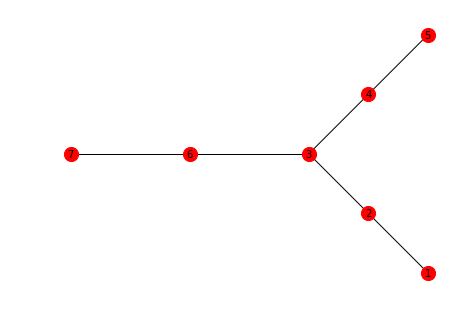

In [17]:
node8_randPF_solar.run_mi_alg(mi_method)

Print out the sucessful detection rate.

In [16]:
print('The SDR is: ' + str(node8_randPF_solar.find_sdr()[0]) + '%')

The SDR is: 100.0%
